# Conjunto de datos para la práctica 01

-----

## Cargamos nuestro conjunto de datos

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import numpy as np

In [110]:
# Cargar los archivos CSV con los datos de entrenamiento y prueba
X_train = pd.read_csv('rice_X_train_pca.csv').values
X_test = pd.read_csv('rice_X_test_pca.csv').values
y_train = pd.read_csv('rice_y_train.csv')['Class'].values
y_test = pd.read_csv('rice_y_test.csv')['Class'].values

# Imprimir las formas de los conjuntos de datos
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3048, 2)
X_test shape: (762, 2)
y_train shape: (3048,)
y_test shape: (762,)


## Visualización de datos de train y test

Es un train-test split de 80% y 20%

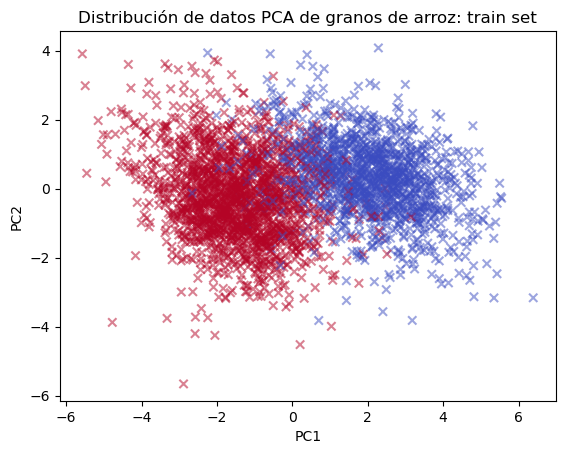

In [111]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='x', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribución de datos PCA de granos de arroz: train set')
plt.show()

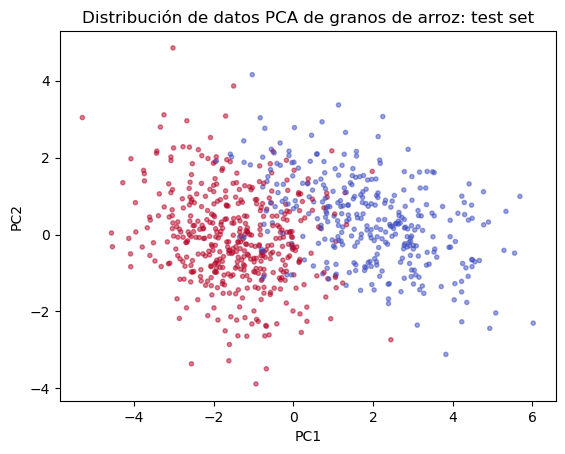

In [112]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='.', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribución de datos PCA de granos de arroz: test set')
plt.show()

-----

A partir de esta celda, pueden continuar con sus ejercicios.

## Ejercicio 1: Dimension VC de hipotesis triangular.

Para el ejercicio 1 primero coloca 7 puntos de manera equidistante sobre el
perímetro de un círculo. Luego debes probar tu hipótesis de triángulo para
separar los puntos de manera binaria. Debes probar los 2

7 distintos etiquetados
binarios. Luego añade un octavo punto y encuentra un caso donde no sea
posible la separación de manera correcta.

### Casos:

#### Caso 0
Este caso es trivial, un triangulo minusculo en el centro satisface el problema.

#### Caso 1
Para este caso simplemente imaginemos  un triangulo pequeño al rededor de del punto a serparar sin que se acerque a ningun otro

#### Caso 2 
Para este caso notemos que podemos facilmente construir un triangulo tomando ambos puntos de interes como vertices y el tercer vertice seria el centro del circulo

#### Caso 3
Notemos que gracias a la geometria del circulo, podemos elegir cuales quiera 3 puntos sobre su circunferencia y usarlos como vertices, esto formara un triagulo que unicamente incluye dichos 3 puntos de la circunferencia, ningun otro

#### Nota:
Notemos que invirtiendo la funcion indicadora ya tendriamos una solucion. Ya que los casos 4, 5, 6 y 7 son problemas reciprocos del 3, 4, 5 y 6.
Pero continuemos manteniendo la funcion intacta.

#### Caso 4
Siendo que existen solo puntos, en este caso es necesario que existan al menos 2 puntos contiguos.
- En todos los casos donde no haya dos parejas separadas, eligiremos los otros 2 como vertices que no son contiguos, luego extendamos rayos al vertice a menos nodos de distancia. Estos rayos convergen necesariamente en algun punto, este sera el tercer vertice.

- El caso particulas de que haya dos parejas separadas es uno de los mas complejos.
Y se vera mejor explicado con un ejemplo visual mas adelante


#### Caso 5
Tiene 3 casos, donde los apagados estan a 0, 1 y 2 de distancia. En cero y uno es trivial, para el caso 2 tomaremos los 3 vertices estan fuera del triangulo igualmente se hara una demostracion visual

El caso 6 y 7 son triviales.

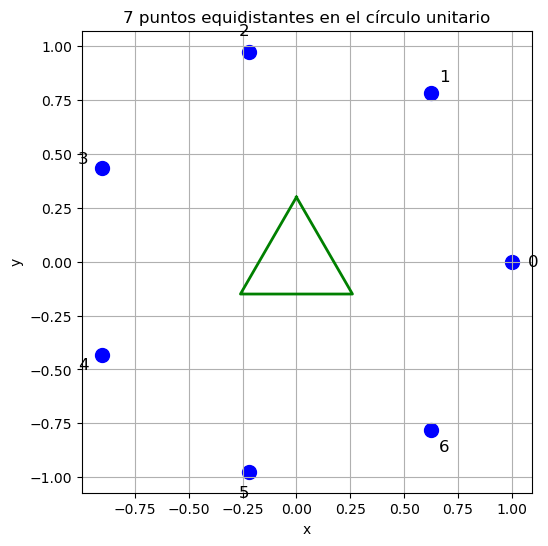

[(1.0, 0.0), (0.6234898018587336, 0.7818314824680297), (-0.22252093395631434, 0.9749279121818236), (-0.900968867902419, 0.43388373911755823), (-0.9009688679024191, -0.433883739117558), (-0.2225209339563146, -0.9749279121818235), (0.6234898018587334, -0.7818314824680299)]


In [113]:


# Generar 7 puntos equidistantes en el perímetro del círculo unitario
n_points = 7
angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
circle_points = np.c_[np.cos(angles), np.sin(angles)]

# Inicializar etiquetas binarias (apagado: 0, prendido: 1)
labels = [0,0,0,0,0,0,0]

# Definir un triángulo inicial en el centro del círculo
triangle = np.array([
    [0.0, 0.3],
    [-0.26, -0.15],
    [0.26, -0.15]
])



# Graficar los puntos
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(circle_points):
    color = 'red' if labels[i] else 'blue'
    plt.scatter(x, y, c=color, s=100)
    plt.text(x * 1.1, y * 1.1, f'{i}', ha='center', va='center', fontsize=12)
    
    
# Dibujar el triángulo en el mismo plot
triangle_closed = np.vstack([triangle, triangle[0]])  # cerrar el triángulo
plt.plot(triangle_closed[:, 0], triangle_closed[:, 1], 'g-', linewidth=2, label='Triángulo inicial')

plt.gca().set_aspect('equal')
plt.title('7 puntos equidistantes en el círculo unitario')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


coords = [(float(x), float(y)) for x, y in circle_points]
print(coords)

### Ingresa la combinacion que desees.

Y ejecuta la celda siguiente.

In [114]:
labels = [1,1,1,1,1,1,0]

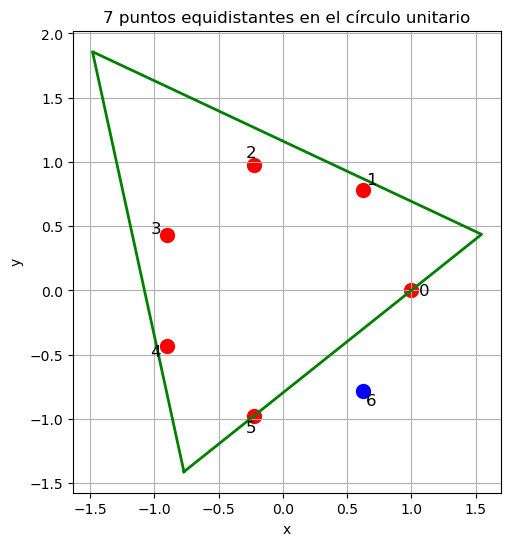

In [115]:
def line_intersection(p1, p2, p3, p4):
                A1 = p2 - p1
                A2 = p4 - p3
                b = p3 - p1
                mat = np.column_stack([A1, -A2])
                if np.linalg.matrix_rank(mat) < 2:
                    return (p1 + p3) / 2
                t = np.linalg.solve(mat, b)
                return p1 + t[0] * A1

def get_triangle_coords(triangle):
    count_ones = labels.count(1)
    idxs = [i for i, val in enumerate(labels) if val == 1]

    if count_ones == 0:
        return [(0.0, 0.3), (-0.26, -0.15), (0.26, -0.15)]
    if count_ones == 1:
        idx = labels.index(1)
        center = np.array(coords[idx])
        radius = 0.15  # small radius for the triangle
        angle_offset = angles[idx]
        triangle = [
            (
                center[0] + radius * np.cos(angle_offset + d),
                center[1] + radius * np.sin(angle_offset + d)
            )
            for d in [0, 2 * np.pi / 3, 4 * np.pi / 3]
        ]
        return triangle
    if count_ones == 2:
        v1 = coords[idxs[0]]
        v2 = coords[idxs[1]]
        center = (0.0, 0.0)
        return [v1, v2, center]
    if count_ones == 3:
        return [coords[i] for i in idxs]
    if count_ones == 4:
        off_pair = any(labels[i] == 0 and labels[(i + 1) % n_points] == 0 for i in range(n_points))
        if off_pair:
            # Encuentra la primera pareja de unos aislados rodeados de ceros
            isolated_pair = None
            for i in range(n_points):
                if labels[i] == 1 and labels[(i + 1) % n_points] == 1:
                    prev_idx = (i - 1) % n_points
                    next_idx = (i + 2) % n_points
                    if labels[prev_idx] == 0 and labels[next_idx] == 0:
                        isolated_pair = (i, (i + 1) % n_points)
                        break

            if isolated_pair is not None:
                idx_a, idx_b = isolated_pair
                p_a = np.array(coords[idx_a])
                p_b = np.array(coords[idx_b])
                midpoint = (p_a + p_b) / 2
                # Dirección hacia afuera: del centro al punto medio
                direction = midpoint / np.linalg.norm(midpoint)
                v1 = midpoint + 2.5 * direction
                # ajusta ligeramente el angulo
                apagados = [i for i, val in enumerate(labels) if val == 0]
                # Encuentra los grupos de ceros
                grupos = []
                grupo_actual = []
                for idx in range(n_points):
                    if labels[idx] == 0:
                        grupo_actual.append(idx)
                    else:
                        if grupo_actual:
                            grupos.append(grupo_actual)
                            grupo_actual = []
                if grupo_actual:
                    grupos.append(grupo_actual)
                # Busca el grupo de longitud 2
                grupo_dos = next((g for g in grupos if len(g) == 2), None)
                if grupo_dos is not None:
                    # Calcula el punto medio del grupo de dos apagados
                    p_apagado = (np.array(coords[grupo_dos[0]]) + np.array(coords[grupo_dos[1]])) / 2
                    dir_apagado = p_apagado - v1
                    dir_apagado = dir_apagado / np.linalg.norm(dir_apagado)
                    v1 = v1 + 0.4 * dir_apagado

                # v2 sobre la recta que une v1 y p_a, a distancia 4 desde v1 hacia p_a
                dir_v1_a = p_a - v1
                dir_v1_a = dir_v1_a / np.linalg.norm(dir_v1_a)
                v2 = v1 + 6 * dir_v1_a

                # v3 sobre la recta que une v1 y p_b, a distancia 4 desde v1 hacia p_b
                dir_v1_b = p_b - v1
                dir_v1_b = dir_v1_b / np.linalg.norm(dir_v1_b)
                v3 = v1 + 6 * dir_v1_b

                return [v1, v2, v3]
        else:
            # Encuentra las dos parejas de puntos encendidos contiguos (permitiendo ceros en medio)
            on_idxs = [i for i, val in enumerate(labels) if val == 1]
            pairs = []
            used = set()
            for idx in on_idxs:
                if idx in used:
                    continue
                # Busca el siguiente encendido contiguo (puede haber ceros en medio)
                for offset in range(1, n_points):
                    next_idx = (idx + offset) % n_points
                    if labels[next_idx] == 1:
                        pairs.append((idx, next_idx))
                        used.add(idx)
                        used.add(next_idx)
                        break
                if len(pairs) == 2:
                    break

            # Toma los puntos de cada pareja
            p1, p2 = np.array(coords[pairs[0][0]]), np.array(coords[pairs[0][1]])
            p3, p4 = np.array(coords[pairs[1][0]]), np.array(coords[pairs[1][1]])

            # Calcula la intersección de las dos rectas
            v1 = line_intersection(p1, p2, p3, p4)

            # Encuentra los puntos encendidos más alejados de v1
            on_points = [np.array(coords[i]) for i in on_idxs]
            dists = [np.linalg.norm(pt - v1) for pt in on_points]
            sorted_pts = [pt for _, pt in sorted(zip(dists, on_points), reverse=True)]
            v2, v3 = sorted_pts[0], sorted_pts[1]

            return [v1, v2, v3]
    if count_ones == 5:
        # Encuentra los índices de los dos puntos apagados (0)
        off_idxs = [i for i, val in enumerate(labels) if val == 0]
        # Calcula la distancia mínima entre ellos en el círculo (considerando wrap-around)
        sep = min((off_idxs[1] - off_idxs[0]) % n_points, (off_idxs[0] - off_idxs[1]) % n_points)
        print("sep:", sep)
        if sep == 1:
            v1 = np.array(coords[(off_idxs[0] - 1) % n_points])
            v2 = np.array(coords[(off_idxs[1] + 1) % n_points])
            midpoint = (v1 + v2) / 2
            direction_to_center = -midpoint / np.linalg.norm(midpoint)
            v3 = midpoint + 9 * direction_to_center
            return [v1, v2, v3]
        if sep == 2:
            # Encuentra el índice del punto encendido entre los dos apagados
            mid_idx = (off_idxs[0] + 1) % n_points if labels[(off_idxs[0] + 1) % n_points] == 1 else (off_idxs[1] + 1) % n_points
            v1 = np.array(coords[mid_idx])

            # Busca los encendidos más cercanos a cada apagado
            on1 = (off_idxs[0] - 1) % n_points
            on2 = (off_idxs[1] + 1) % n_points

            # v2 estará sobre la recta que une a on1 y v1 pero a una distancia de 4 desde v1 hacia on1
            v2_dir = np.array(coords[on1]) - v1
            v2_dir = v2_dir / np.linalg.norm(v2_dir)
            v2 = v1 + 4 * v2_dir

            # v3 estará sobre la recta que une a on2 y v1 pero a una distancia de 4 desde v1 hacia on2
            v3_dir = np.array(coords[on2]) - v1
            v3_dir = v3_dir / np.linalg.norm(v3_dir)
            v3 = v1 + 4 * v3_dir

            return [v1, v2, v3]
        
        if sep == 3:
            # Encuentra los puntos que rodean a cada apagado
            on1_a = (off_idxs[0] - 1) % n_points
            on1_b = (off_idxs[0] + 1) % n_points
            on2_a = (off_idxs[1] - 1) % n_points
            on2_b = (off_idxs[1] + 1) % n_points
            print(on1_a, on1_b, on2_a, on2_b)
            # Recta 1: une on1_a y on1_b
            p1 = np.array(coords[on1_a])
            p2 = np.array(coords[on1_b])
            # Recta 2: une on2_a y on2_b
            p3 = np.array(coords[on2_a])
            p4 = np.array(coords[on2_b])

            # Calcula la intersección de las dos rectas
            

            v1 = line_intersection(p1, p2, p3, p4)
            
            # v2 estará sobre la recta que une a p1 y p2, pero a una distancia 3 de v1
            dir12 = p1 - p2
            dir12 = dir12 / np.linalg.norm(dir12)
            v2 = v1 + 4 * dir12

            # v3 estará sobre la recta que une a p3 y p4, pero a una distancia 3 de v1
            dir34 = p3 - p4
            dir34 = dir34 / np.linalg.norm(dir34)
            v3 = v1 - 4 * dir34

            return [v1, v2, v3]
        
    if count_ones == 6:
        missing_idx = labels.index(0)
        n = len(labels)

        # indices de los puntos contiguos al apagado
        idx_prev = (missing_idx - 1) % n
        idx_next = (missing_idx + 1) % n
        p1 = np.array(coords[idx_prev])
        p2 = np.array(coords[idx_next])

        # Vector de p1 a p2
        direction = p2 - p1
        direction = direction / np.linalg.norm(direction)
        # extender para encerrar a todos
        v1 = p1 - 0.7 * direction
        v2 = p2 + 0.7 * direction

        # El tercer vértice estará lejos del círculo, en la dirección opuesta al punto apagado
        midpoint = (v1 + v2) / 2
        to_center = -midpoint
        to_center = to_center / np.linalg.norm(to_center)
        v3 = midpoint + 3 * to_center

        triangle = np.array([v1, v2, v3])
        return triangle
    if count_ones == 7:
        return [(2, 0), (-1.5, 2), (-1.5, -2)]
        
        
plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(circle_points):
    color = 'red' if labels[i] else 'blue'
    plt.scatter(x, y, c=color, s=100)
    plt.text(x * 1.1, y * 1.1, f'{i}', ha='center', va='center', fontsize=12)
    
triangle = np.array(get_triangle_coords(triangle))
    
# Dibujar el triángulo en el mismo plot
triangle_closed = np.vstack([triangle, triangle[0]])  # cerrar el triángulo
plt.plot(triangle_closed[:, 0], triangle_closed[:, 1], 'g-', linewidth=2, label='Triángulo inicial')

plt.gca().set_aspect('equal')
plt.title('7 puntos equidistantes en el círculo unitario')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


        

### Caso imposible de separar con 8 puntos.
Como podemos notar, en el siguiente plot, no es posible formar un triangulo que encierre a solo los puntos rojos.
Notemos que ninguno de los puntos podria ser un vertice ya que entonces seria imposible encerrar al punto en el lado opuesto.
Luego, dentro de las cotas que se dan por que cada punto rojo esta rodeado de azules, no es posible extender el triangulo lo suficiente para incluir los puntos en el lado opuesto y simultaneamente excluir el que esta entre ellos.

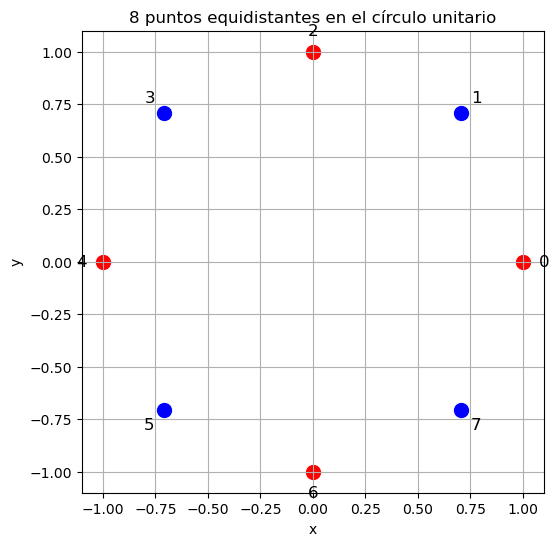

In [116]:
# Generar 8 puntos equidistantes en el perímetro del círculo unitario
n_points_8 = 8
angles_8 = np.linspace(0, 2 * np.pi, n_points_8, endpoint=False)
circle_points_8 = np.c_[np.cos(angles_8), np.sin(angles_8)]

# Etiquetas para los 8 puntos (puedes modificar esta lista según el caso que quieras probar)
labels_8 = [1, 0, 1, 0, 1, 0, 1, 0]

plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(circle_points_8):
    color = 'red' if labels_8[i] else 'blue'
    plt.scatter(x, y, c=color, s=100)
    plt.text(x * 1.1, y * 1.1, f'{i}', ha='center', va='center', fontsize=12)

plt.gca().set_aspect('equal')
plt.title('8 puntos equidistantes en el círculo unitario')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Ejercicio 2" Elipses.

Cambie un poco la logica con respecto a mi tarea ya que me di cuenta de algunas areas de oportnidad para simplificar las cosas.

In [117]:
print(X_train.shape)
print(X_train)

print(y_train.shape)
print(y_train)

(3048, 2)
[[ 0.11402326 -1.64637927]
 [ 3.13892548 -0.75439741]
 [-1.90056436 -0.59906992]
 ...
 [-2.18470918  0.75825855]
 [-0.83951665  1.74119146]
 [ 0.16787743 -0.03227514]]
(3048,)
[1 0 1 ... 1 1 0]


In [154]:
def puntos_dentro_elipse(params, puntos, etiquetas):
    h, k, a, b = params
    inside = []
    for (x, y) in puntos:
        val = ((x - h) ** 2) / (a ** 2) + ((y - k) ** 2) / (b ** 2)
        inside.append(val <= 1)
    # Contar cuántos puntos con etiqueta 1 y 0 están dentro de la elipse
    count_1 = sum(i and (e == 1) for i, e in zip(inside, etiquetas))
    count_0 = sum(i and (e == 0) for i, e in zip(inside, etiquetas))
    return (count_1, count_0)


def min_elip(puntos, etiquetas):
    # Calcula el punto promedio (centroide) del conjunto de puntos
    puntos = np.asarray(puntos)
    etiquetas = np.asarray(etiquetas)
    puntos_positivos = puntos[etiquetas == 1]
    centroide = np.mean(puntos_positivos, axis=0)
    h = centroide[0]
    k = centroide[1]
    a = 1
    b = 1
    
    salto = .1
    tasa_de_error = 0
    while tasa_de_error <= .1:
        count_1, count_0 = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        tasa_de_error = count_0 / (count_1 + count_0)

        # Probar incremento en a
        a_test = a + salto
        count_1_a, count_0_a = puntos_dentro_elipse([h, k, a_test, b], puntos, etiquetas)
        tasa_error_a = count_0_a / (count_1_a + count_0_a)
        # Probar incremento en b
        b_test = b + salto
        count_1_b, count_0_b = puntos_dentro_elipse([h, k, a, b_test], puntos, etiquetas)
        tasa_error_b = count_0_b / (count_1_b + count_0_b)

        if count_1 == count_1_a and count_1 == count_1_b:
            a += salto
            b += salto
        elif count_1_a > count_1_b:
            a += salto
        else:
            b += salto
            
    
    print("Tasa de error antes de refinar:", tasa_de_error)
        
    print("Refinando...")

    salto_decremento = 0.05
    pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
    temp = pos
    while  True:
        a -= salto_decremento
        pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        if pos != temp:
            a += salto_decremento
            break
    while  True:
        b -= salto_decremento
        pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        if pos < temp:
            b += salto_decremento
            break
    
    return [h, k, a, b]


param_min_elip = min_elip(X_train, y_train)

def max_elip(puntos, etiquetas, min_params):
    h, k, a, b = min_params
    salto = 0.01

    while True:
        # Probar incrementar a
        a_test = a + salto
        count_1_a, count_0_a = puntos_dentro_elipse([h, k, a_test, b], puntos, etiquetas)
        # Probar incrementar b
        b_test = b + salto
        count_1_b, count_0_b = puntos_dentro_elipse([h, k, a, b_test], puntos, etiquetas)

        # Revisar si al incrementar a o b se agregan puntos negativos (etiqueta 0)
        if count_0_a > puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)[1] and \
           count_0_b > puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)[1]:
            break  # No podemos crecer más sin incluir más negativos

        # Elegir el incremento que no agregue negativos y maximice positivos
        if count_0_a == puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)[1] and count_1_a >= count_1_b:
            a = a_test
        elif count_0_b == puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)[1]:
            b = b_test
        else:
            break

    return [h, k, a, b]

param_max_elip = max_elip(X_train, y_train, param_min_elip)

def mid_elip(min_params, max_params):
    h_min, k_min, a_min, b_min = min_params
    h_max, k_max, a_max, b_max = max_params
    h_mid = (h_min + h_max) / 2
    k_mid = (k_min + k_max) / 2
    a_mid = (a_min + a_max) / 2
    b_mid = (b_min + b_max) / 2
    return [h_mid, k_mid, a_mid, b_mid]

param_mid_elip = mid_elip(param_min_elip, param_max_elip)
    


Tasa de error antes de refinar: 0.10838323353293414
Refinando...


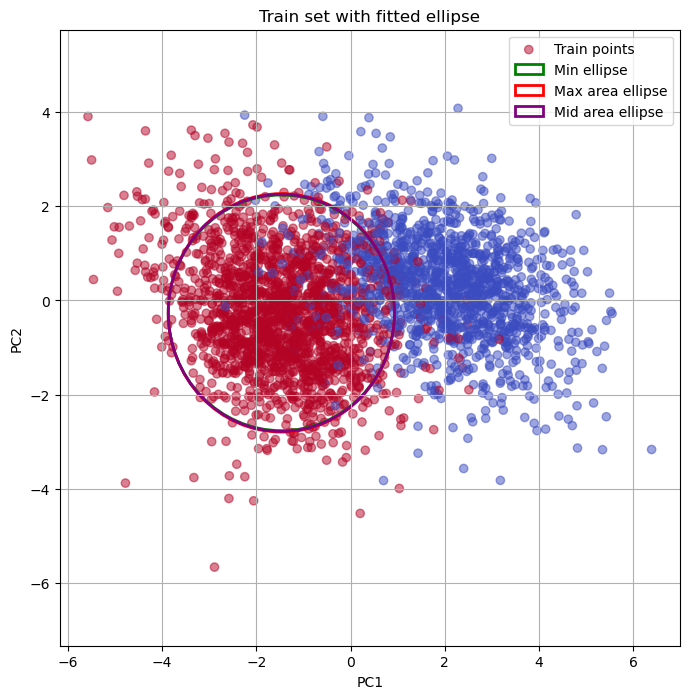

Parameters of the fitted ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.5000000000000013]
Parameters of the max area ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.5300000000000007]
Parameters of the mid area ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.515000000000001]


In [155]:
plt.figure(figsize=(8, 8))
# Plot points with color by label
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, label='Train points')

# Min
h, k, a, b = param_min_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='green', facecolor='none', linewidth=2, label='Min ellipse')
plt.gca().add_patch(ellipse)

# Max
h, k, a, b = param_max_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='red', facecolor='none', linewidth=2, label='Max area ellipse')
plt.gca().add_patch(ellipse)

# Mid
h, k, a, b = param_mid_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='purple', facecolor='none', linewidth=2, label='Mid area ellipse')
plt.gca().add_patch(ellipse)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train set with fitted ellipse')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print("Parameters of the fitted ellipse (h, k, a, b):", param_min_elip)
print("Parameters of the max area ellipse (h, k, a, b):", param_max_elip)
print("Parameters of the mid area ellipse (h, k, a, b):", param_mid_elip)

### Probar en conjunto de pruena

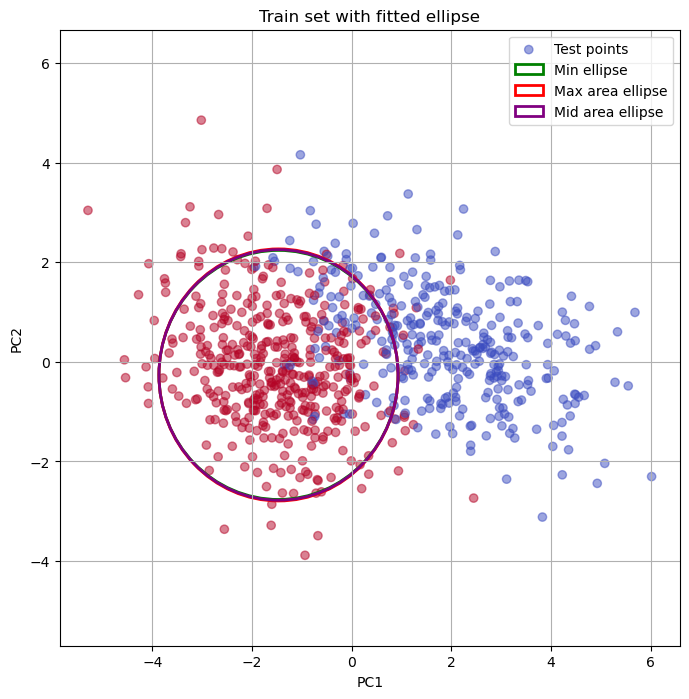

Parameters of the fitted ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.5000000000000013]
Parameters of the max area ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.5300000000000007]
Parameters of the mid area ellipse (h, k, a, b): [np.float64(-1.468874942339167), np.float64(-0.2635788011662446), 2.4000000000000012, 2.515000000000001]


In [146]:
plt.figure(figsize=(8, 8))
# Plot points with color by label
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.5, label='Test points')

# Min
h, k, a, b = param_min_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='green', facecolor='none', linewidth=2, label='Min ellipse')
plt.gca().add_patch(ellipse)

# Max
h, k, a, b = param_max_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='red', facecolor='none', linewidth=2, label='Max area ellipse')
plt.gca().add_patch(ellipse)

# Mid
h, k, a, b = param_mid_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='purple', facecolor='none', linewidth=2, label='Mid area ellipse')
plt.gca().add_patch(ellipse)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Train set with fitted ellipse')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

print("Parameters of the fitted ellipse (h, k, a, b):", param_min_elip)
print("Parameters of the max area ellipse (h, k, a, b):", param_max_elip)
print("Parameters of the mid area ellipse (h, k, a, b):", param_mid_elip)

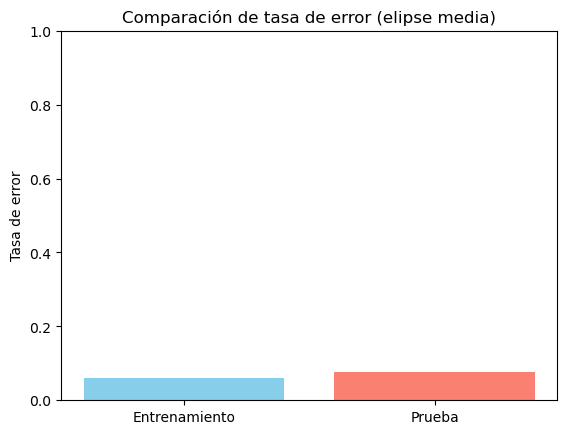

Tasa de error en entrenamiento: 0.061
Tasa de error en prueba: 0.076


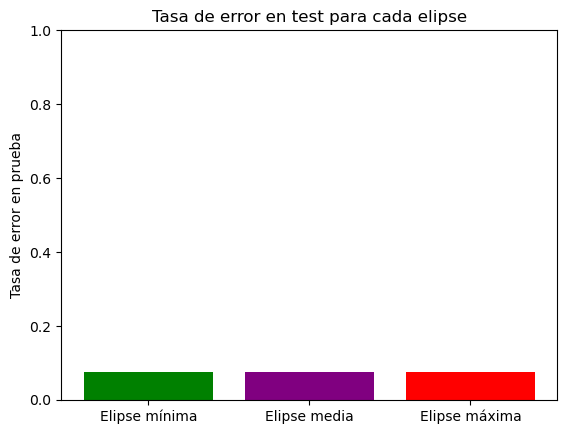

Tasa de error en test (elipse mínima): 0.076
Tasa de error en test (elipse media): 0.076
Tasa de error en test (elipse máxima): 0.076
Puntos con etiqueta 1 dentro de la elipse media: 381
Puntos con etiqueta 0 dentro de la elipse media: 58


In [170]:
def tasa_error_elipse(params, puntos, etiquetas):
    count_1, count_0 = puntos_dentro_elipse(params, puntos, etiquetas)
    total = len(etiquetas)
    tasa_error = count_0 / total
    return tasa_error

# Calcula la tasa de error para el conjunto de entrenamiento y prueba usando la elipse media
train_error = tasa_error_elipse(param_mid_elip, X_train, y_train)
test_error = tasa_error_elipse(param_mid_elip, X_test, y_test)

# Gráfica comparativa
plt.bar(['Entrenamiento', 'Prueba'], [train_error, test_error], color=['skyblue', 'salmon'])
plt.ylabel('Tasa de error')
plt.title('Comparación de tasa de error (elipse media)')
plt.ylim(0, 1)
plt.show()

print(f"Tasa de error en entrenamiento: {train_error:.3f}")
print(f"Tasa de error en prueba: {test_error:.3f}")


# Calcular tasa de error en test para cada elipse
test_error_min = tasa_error_elipse(param_min_elip, X_test, y_test)
test_error_max = tasa_error_elipse(param_max_elip, X_test, y_test)

# Graficar comparación
plt.bar(['Elipse mínima', 'Elipse media', 'Elipse máxima'],
    [test_error_min, test_error, test_error_max],
    color=['green', 'purple', 'red'])
plt.ylabel('Tasa de error en prueba')
plt.title('Tasa de error en test para cada elipse')
plt.ylim(0, 1)
plt.show()

print(f"Tasa de error en test (elipse mínima): {test_error_min:.3f}")
print(f"Tasa de error en test (elipse media): {test_error:.3f}")
print(f"Tasa de error en test (elipse máxima): {test_error_max:.3f}")

count_1, count_0 = puntos_dentro_elipse(param_mid_elip, X_test, y_test)
print(f"Puntos con etiqueta 1 dentro de la elipse media: {count_1}")
print(f"Puntos con etiqueta 0 dentro de la elipse media: {count_0}")

### Discusion de resultados

Debido a lo juntos que estan los puntos, la diferencia entre las elipses es minima. Por lo tanto no me parece que sea razonable sacar ninguna conclucion entre la diferencia entre las tres elipses.



### Ejercicio 3

In [180]:
def tasa_error_difusa(params, puntos, etiquetas):
    h, k, a, b = params
    puntos = np.asarray(puntos)
    etiquetas = np.asarray(etiquetas)

    # Elipse interna (90% del área)
    a_int = a * np.sqrt(0.8)
    b_int = b * np.sqrt(0.8)

    errores = 0
    for (x, y), etiqueta in zip(puntos, etiquetas):
        val = ((x - h) ** 2) / (a ** 2) + ((y - k) ** 2) / (b ** 2)
        val_int = ((x - h) ** 2) / (a_int ** 2) + ((y - k) ** 2) / (b_int ** 2)
        pred = int(val <= 1)
        if val_int <= 1:
            # Dentro de la elipse interna: penalización 1 si error
            if pred != etiqueta:
                errores += 1
        elif val <= 1:
            # En la franja difusa: penalización lineal
            penal = (1 - (val_int - 1) / (val - val_int)) if (val - val_int) != 0 else 1
            if pred != etiqueta:
                errores += penal
        # Fuera de la elipse: penalización 0

    tasa_error = errores / len(etiquetas)
    return tasa_error

def dif_elipse(puntos, etiquetas):
    # Calcula el punto promedio (centroide) del conjunto de puntos
    puntos = np.asarray(puntos)
    etiquetas = np.asarray(etiquetas)
    puntos_positivos = puntos[etiquetas == 1]
    centroide = np.mean(puntos_positivos, axis=0)
    h = centroide[0]
    k = centroide[1]
    a = 1
    b = 1
    
    salto = .1
    tasa_de_error = 0
    while tasa_de_error <= .1:
        count_1, count_0 = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        tasa_de_error = tasa_error_difusa([h, k, a, b], puntos, etiquetas)

        # Probar incremento en a
        a_test = a + salto
        count_1_a, count_0_a = puntos_dentro_elipse([h, k, a_test, b], puntos, etiquetas)
        tasa_error_a = tasa_error_difusa([h, k, a_test, b], puntos, etiquetas)
        # Probar incremento en b
        b_test = b + salto
        count_1_b, count_0_b = puntos_dentro_elipse([h, k, a, b_test], puntos, etiquetas)
        tasa_error_b = tasa_error_difusa([h, k, a, b_test], puntos, etiquetas)

        if count_1 == count_1_a and count_1 == count_1_b:
            a += salto
            b += salto
        elif count_1_a > count_1_b:
            a += salto
        else:
            b += salto
            

    salto_decremento = 0.05
    pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
    temp = pos
    while  True:
        a -= salto_decremento
        pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        if pos != temp:
            a += salto_decremento
            break
    while  True:
        b -= salto_decremento
        pos, neg = puntos_dentro_elipse([h, k, a, b], puntos, etiquetas)
        if pos < temp:
            b += salto_decremento
            break
    
    return [h, k, a, b]


param_dif_elip = dif_elipse(X_train, y_train)


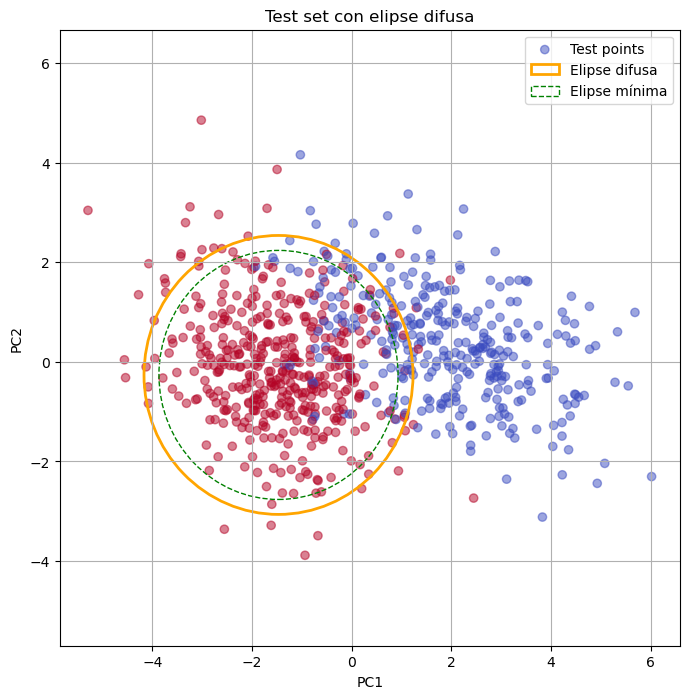

Tasa de error con elipse difusa en test: 0.13565114968416472
Tasa de error simple en elipse difusa 0.17959183673469387
402 88
Tasa de error difusa en elipse minima en test: 0.09035275647564925
Tasa de error simple en elipse minima 0.1324200913242009
380 58


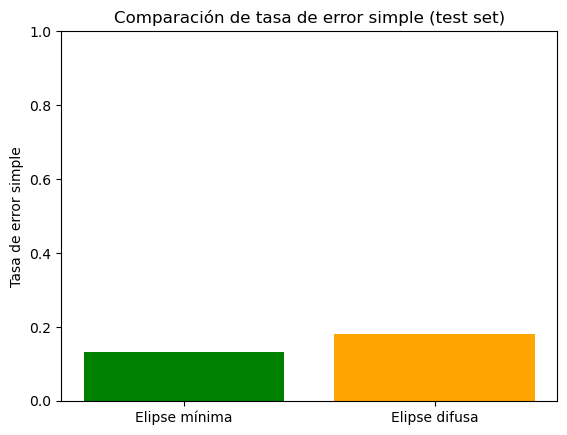

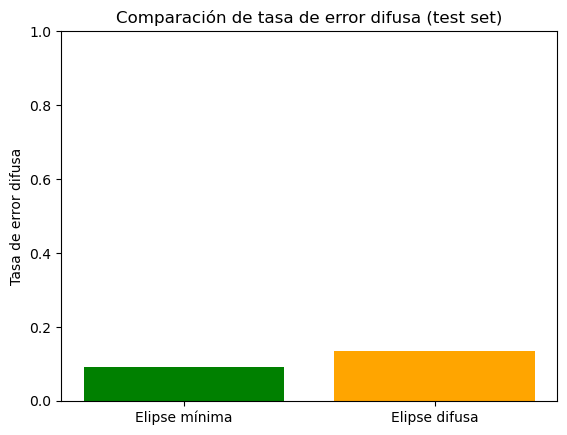

In [182]:
plt.figure(figsize=(8, 8))
# Graficar puntos de test coloreados por etiqueta
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.5, label='Test points')

# Elipse difusa
h, k, a, b = param_dif_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='orange', facecolor='none', linewidth=2, label='Elipse difusa')
plt.gca().add_patch(ellipse)

#elipse minima para referencia
h, k, a, b = param_min_elip
ellipse = Ellipse((h, k), 2*a, 2*b, edgecolor='green', facecolor='none', linewidth=1, linestyle='--', label='Elipse mínima')
plt.gca().add_patch(ellipse)


plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Test set con elipse difusa')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

count_1, count_0 = puntos_dentro_elipse(param_dif_elip, X_test, y_test)
tasa_de_error = count_0 / (count_1 + count_0)

print("Tasa de error con elipse difusa en test:", tasa_error_difusa(param_dif_elip, X_test, y_test))
print("Tasa de error simple en elipse difusa", tasa_de_error)
print(count_1, count_0)

count_1_min, count_0_min = puntos_dentro_elipse(param_min_elip, X_test, y_test)
tasa_de_error_min = count_0_min / (count_1_min + count_0_min)
print("Tasa de error difusa en elipse minima en test:", tasa_error_difusa(param_min_elip, X_test, y_test))
print("Tasa de error simple en elipse minima",  tasa_de_error_min)
print(count_1_min, count_0_min)


plt.bar(['Elipse mínima', 'Elipse difusa'], [tasa_de_error_min, tasa_de_error], color=['green', 'orange'])
plt.ylabel('Tasa de error simple')
plt.title('Comparación de tasa de error simple (test set)')
plt.ylim(0, 1)
plt.show()

# Calcular tasa de error difusa para ambas elipses
tasa_error_difusa_dif = tasa_error_difusa(param_dif_elip, X_test, y_test)
tasa_error_difusa_min = tasa_error_difusa(param_min_elip, X_test, y_test)

plt.bar(['Elipse mínima', 'Elipse difusa'], [tasa_error_difusa_min, tasa_error_difusa_dif], color=['green', 'orange'])
plt.ylabel('Tasa de error difusa')
plt.title('Comparación de tasa de error difusa (test set)')
plt.ylim(0, 1)
plt.show()


#### Discucion de resultados

Como se esperaba el error total de la elipse difusa es mayor, pero es importante resaltar que aumento su cobertura.

De esta ultima obvservacion intuyo que el valor de este tipo de perdidas "relajadas" o "difusas" cuando la covertura de una funcion más estricta resulta inconveniente.

Por ejemplo, si nuestra funcion buscara identificar riesgos, es mejor para nosotros arriesgarnos a tener más falsos positivos si eso significa tener una mayor covertura. Habiendo dicho eso, una perdida como la utilizada me parece que rara vez tendria alguna utilidad, habria que agregarle un penalizacion para puntos positivos fuera de la elipse u hacer otro tipo de modificaciones para que su desempeño difiera mas de la funcion inicial